Servo prediction using linear regression

To develop a model that accurately predicts the bevaviour or output of a servo system based on input parameters enabling precise control and optimization



Servo System Dataset


Import Library


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

Import CSV as DataFrame


In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

or use local file path in Jupyter Notebook

In [ ]:
#df = pd.read_csv(r'C:\Users \YBI Foundation \Desktop \Servo Mechanism.csv')

or use file path after uploading file in google colab notebook

In [ ]:
# df = pd.read_csv(r'/content/Servo Mechanism.csv')

Get the First Five Rows of Dataframe

In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Get Information of Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Get the summary statistics

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Get column names

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

Get shape of dataframe

In [ ]:
df.shape

(167, 5)

Get categories and counts of categorical variables

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


Get Encoding of categorical Features

In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D' :3,'E':4}},inplace=True)

<ipython-input-20-dae81bfed2e0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Motor':{'A':0,'B':1,'C':2,'D' :3,'E':4}},inplace=True)


In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D' :3,'E':4}},inplace=True)

<ipython-input-16-653db2125e12>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Screw':{'A':0,'B':1,'C':2,'D' :3,'E':4}},inplace=True)


Define y (dependent or label or target variable )and X (independent or features or attribute variable)

In [ ]:
y =df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
X = df[['Motor' ,'Screw','Pgain','Vgain']]

or use.drop function to define X

In [ ]:
X = df.drop('Class' , axis=1)

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,E,5,4
1,1,D,6,5
2,3,D,4,3
3,1,A,3,2
4,3,B,6,5
...,...,...,...,...
162,1,C,3,2
163,1,E,3,1
164,2,D,4,3
165,0,B,3,2


Get Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size = 0.3, random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

Get Model Train

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is a pandas DataFrame

# Identify columns with non-numeric data
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check for object dtype, indicating strings
        print(f"Column '{col}' contains non-numeric data.")

        # 1. Attempt to convert to numeric using pd.to_numeric
        try:
            X_train[col] = pd.to_numeric(X_train[col], errors='raise')
        except ValueError:
            print(f"Could not directly convert '{col}' to numeric. Using Label Encoding.")

            # 2. If direct conversion fails, use Label Encoding
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])

            # Apply the same encoding to X_test for consistency
            X_test[col] = le.transform(X_test[col])

Column 'Screw' contains non-numeric data.
Could not directly convert 'Screw' to numeric. Using Label Encoding.


Get model prediction

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train are defined

# ... (Your code for data preprocessing) ...

lr = LinearRegression()
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train are defined

# ... (Your code for data preprocessing) ...

lr = LinearRegression()

# Fit the model to your training data
lr.fit(X_train, y_train)

LinearRegression()

Get model prediction

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(51,)

In [ ]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Get model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [ ]:
 mean_absolute_error(y_test,y_pred)

7.190539677251235

In [ ]:
r2_score(y_test,y_pred)

0.6807245170563927

Get Visulization of Actual Vs Predicted Results

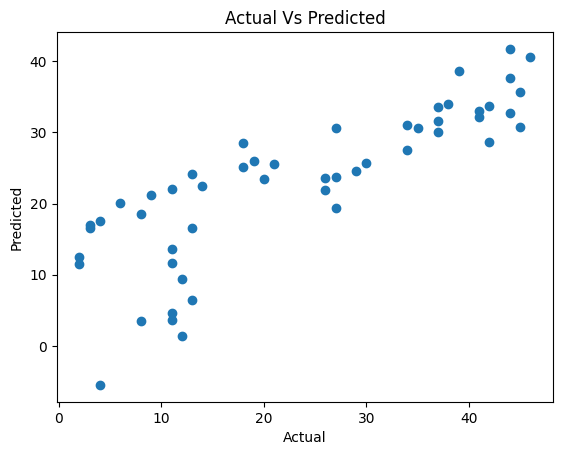

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.show()


Get Future Predictions

In [ ]:
X_new =df.sample(1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
92,0,A,4,3,30


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new = X_new.drop('Class',axis=1)


In [ ]:
X_new

,Motor,Screw,Pgain,Vgain
92,0,A,4,3


In [ ]:
X_new.shape

(1, 4)

In [ ]:
# Assuming 'X_new' is your DataFrame
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify the columns containing strings/objects
categorical_cols = X_new.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the categorical features
for col in categorical_cols:
    # Fit and transform the data using LabelEncoder
    X_new[col] = encoder.fit_transform(X_new[col])

# Now you can predict using the encoded data
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new =lr.predict(X_new)

In [ ]:
y_pred_new

array([34.68250884])